# 서울&경기 확진자의 감염 케이스 확인(월별) 
---  

### 개요  
- '03 노트북'에서 얻은 인사이트 '각 지역 감염 케이스별'의 심화 과정
- 서울, 경기 케이스별 확진자를 월별로 확인함

### 목차  
1. 데이터 로드
2. 데이터 가공
3. 4월 서울, 경기지역 확진자 비율 바 그래프
4. 5월 서울, 경기지역 확진자 비율 바 그래프
5. 6월 서울, 경기지역 확진자 비율 바 그래프

###     시각화  
- 지역(서울, 경기), 시점(4/1이후, 5/1이후, 6/1이후), 감염 케이스 비율 (파이그래프)

### 결론
- 각 월별로 원인은 달랐으나 모이는 모임들과 같은 케이스가 항상 높은 순위에 있었다. 이후 감염자의 케이스 정보가 그룹 감염인지 비그룹 감염인지 확인히 필요할것 같다.

---
## 1. 데이터 로드

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import numpy as np


from pprint import pprint as pp

import folium 
from folium import plugins
from folium.plugins import HeatMap

In [8]:
df_TimeProvince = pd.read_csv('/home/seong/workspace/covid/Data/TimeProvince.csv')
df_PatientInfo = pd.read_csv('/home/seong/workspace/covid/Data/PatientInfo.csv')

df_timeProvince_fin = df_TimeProvince[['date', 'province', 'confirmed']]

---
## 2. 데이터 가공

In [9]:
# 4월 1일 이후 서울, 경기 환자정보

patientInfo_seoul_april = df_PatientInfo[
                        (df_PatientInfo.province.isin(['Gyeonggi-do','Seoul'])) &
                        (df_PatientInfo.confirmed_date >= '2020-04-01') ]


# 5월 1일 이후 서울, 경기 환자정보

patientInfo_seoul_may = df_PatientInfo[
                        (df_PatientInfo.province.isin(['Gyeonggi-do','Seoul'])) &
                        (df_PatientInfo.confirmed_date >= '2020-05-01') ]


# 6월 1일 이후 서울, 경기 환자정보

patientInfo_seoul_june = df_PatientInfo[
                        (df_PatientInfo.province.isin(['Gyeonggi-do','Seoul'])) &
                        (df_PatientInfo.confirmed_date >= '2020-06-01') ]


# 4월 서울/경기 환자 감염사례 별 확진자수 (내림차순)
confirmed_seoul_april = patientInfo_seoul_april.groupby('infection_case')['infection_case'].count().sort_values(ascending=True).tail(10)

# 5월 서울/경기 환자 감염사례 별 확진자수 (내림차순)
confirmed_seoul_may = patientInfo_seoul_may.groupby('infection_case')['infection_case'].count().sort_values(ascending=True).tail(10)

# 6월 서울/경기 환자 감염사례 별 확진자수 (내림차순)
confirmed_seoul_june = patientInfo_seoul_june.groupby('infection_case')['infection_case'].count().sort_values(ascending=True).tail(10)

---
## 3. 4월 서울경기지역 확진자 비율 바 그래프

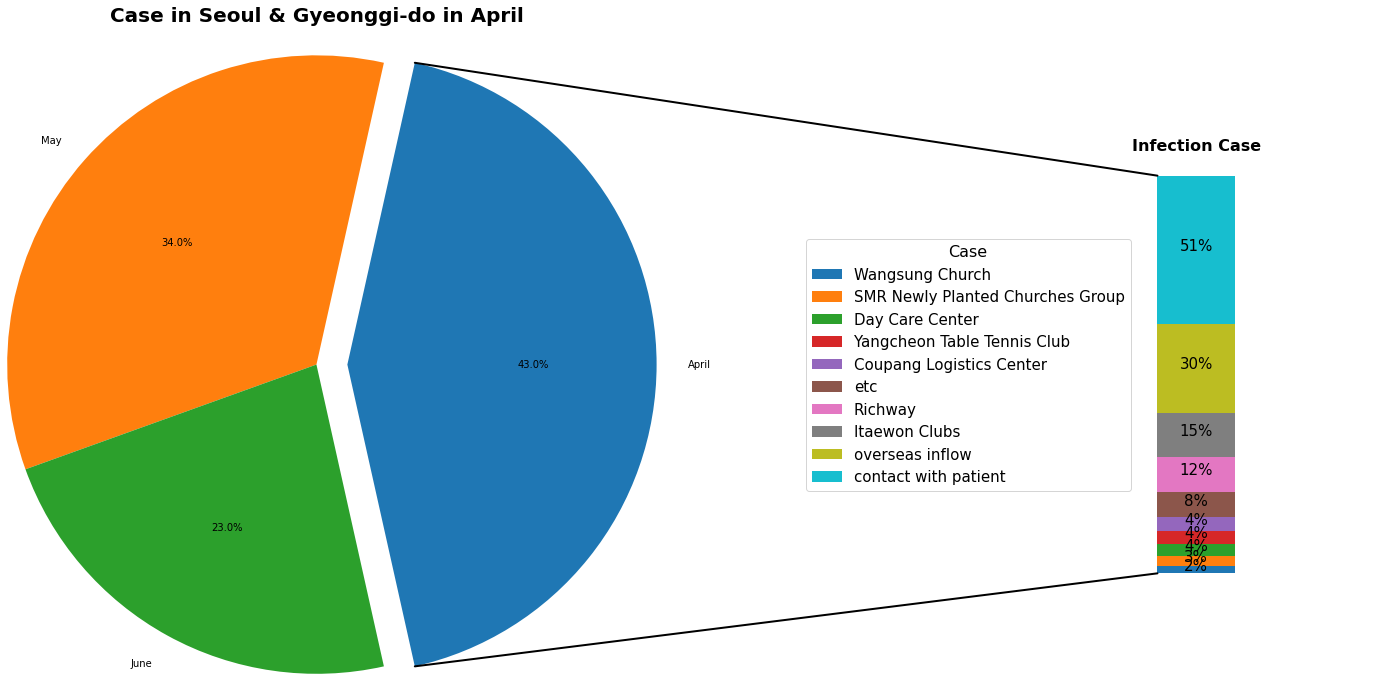

In [10]:
# 4월 서울경기지역 확진자 비율 Bar of Pie

frame = plt.figure(figsize = (20, 10))
pie1 = frame.add_subplot(1, 2, 1)
bar1 = frame.add_subplot(1, 2, 2)


# pie1 chart parameters
ratios = [.43 , .34 , .23]
labels = ['April', 'May', 'June' ]


angle1 = - (360* ratios[0])/2
angle2 = - ((360 * ratios[0])+ (360* ratios[1])/2)
angle3 = - ((360 * ratios[0]) + (360* ratios[1])+ (360* ratios[2])/2)

 
pie1.pie(ratios, autopct='%1.1f%%', startangle= angle1, labels=labels, counterclock = True, radius = 2, explode = (0.2, 0, 0) )
pie1.set_title("Case in Seoul & Gyeonggi-do in April", fontdict={ 'fontsize' : 20, 'fontweight':'bold' } , pad= 150)


# bar1 chart parameters

xpos = 0
bottom = 0
ratios = confirmed_seoul_april.values
width = .2

for j in range(len(ratios)):
    height = ratios[j]
    bar1.bar(xpos, height, width, bottom=bottom, align='center' )
    ypos = bottom + bar1.patches[j].get_height() / 2
    bottom += height
    bar1.text(xpos, ypos, "%d%%" % (bar1.patches[j].get_height() * .1),
             ha='center' , fontsize = 15 )

bar1.set_title('Infection Case' , fontsize = 16 ,  fontdict={'fontweight':'bold'})
bar1.axis('off')
bar1.set_xlim(- 2.5 * width, 2.5 * width)
bar1.legend(confirmed_seoul_april.index, loc = 'center right', bbox_to_anchor=(0.35, 0.5), 
            fontsize = 15, title='Case', title_fontsize=16)


# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = pie1.patches[0].theta1, pie1.patches[0].theta2
center, r = pie1.patches[0].center, pie1.patches[0].r
bar_height = sum([item.get_height() for item in bar1.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r* np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=bar1.transData,
                      xyB=(x, y), coordsB=pie1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
bar1.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r* np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=bar1.transData,
                      xyB=(x, y), coordsB=pie1.transData)
con.set_color([0, 0, 0])
bar1.add_artist(con)
con.set_linewidth(2)



plt.tight_layout()
# plt.savefig('4월_서울경기지역_확진자_비율_Bar_of_Pie', bbox_inches='tight') # 그림파일로 그래프를 저장함

---
## 4. 5월 서울경기지역 확진자 비율 바 그래프

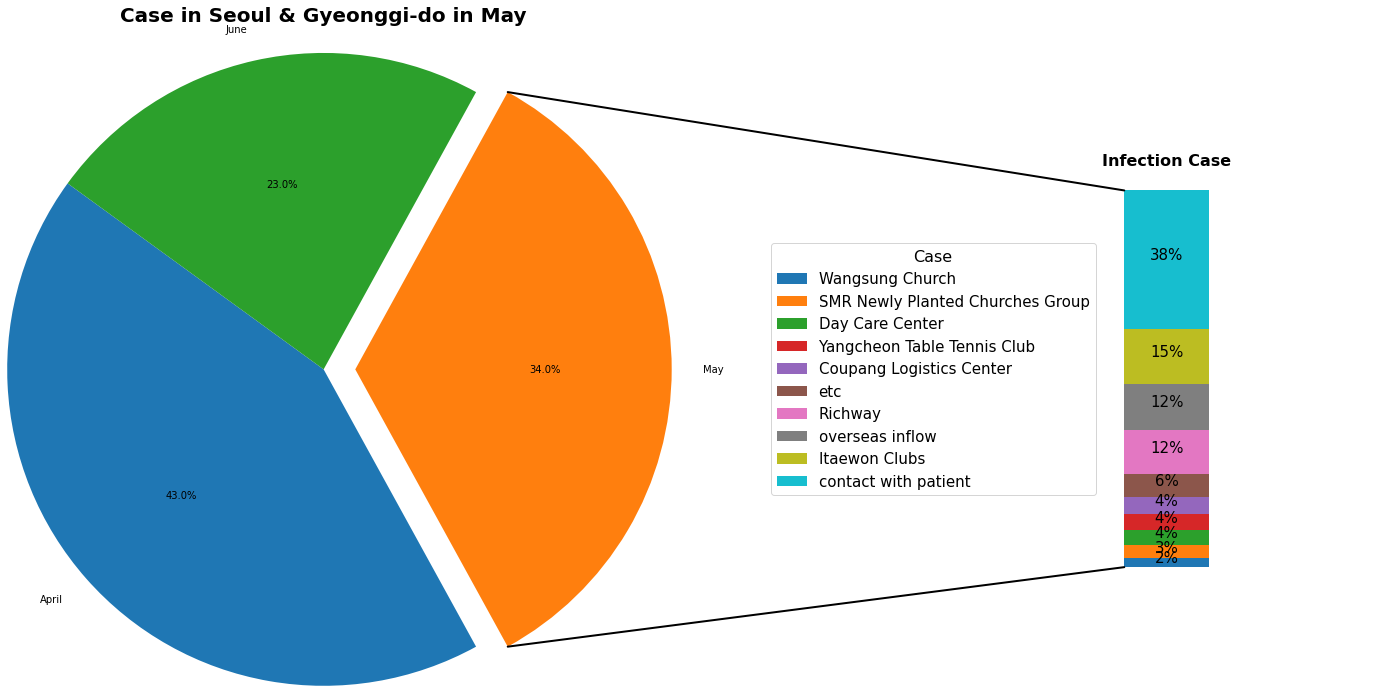

In [11]:
# 5월 서울경기지역 확진자 비율 Bar of Pie 그리기


frame = plt.figure(figsize = (20, 10))
pie2 = frame.add_subplot(1, 2, 1)
bar2 = frame.add_subplot(1, 2, 2)


# pie2 chart parameters
ratios = [.43 , .34 , .23]
labels = ['April', 'May', 'June' ]


angle1 = - (360* ratios[0])/2
angle2 = - ((360 * ratios[0])+ (360* ratios[1])/2)
angle3 = - ((360 * ratios[0]) + (360* ratios[1])+ (360* ratios[2])/2)


# 파이 그리기

pie2.pie(ratios, autopct='%1.1f%%', startangle= angle2, labels=labels, counterclock = True, radius = 2, explode = (0, 0.2, 0) )
pie2.set_title("Case in Seoul & Gyeonggi-do in May", fontdict={ 'fontsize' : 20, 'fontweight':'bold' } , pad= 150)


# bar2 parameters

xpos = 0
bottom = 0
ratios = confirmed_seoul_may.values
width = .2
# colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    bar2.bar(xpos, height, width, bottom=bottom, align='center')
    ypos = bottom + bar2.patches[j].get_height() / 2
    bottom += height
    bar2.text(xpos, ypos, "%d%%" % (bar2.patches[j].get_height() * .1),
             ha='center' , fontsize = 15)

bar2.set_title('Infection Case' ,  fontsize = 16 ,  fontdict={'fontweight':'bold'})
bar2.axis('off')
bar2.set_xlim(- 2.5 * width, 2.5 * width)
bar2.legend(confirmed_seoul_may.index, loc = 'center right', bbox_to_anchor=(0.35, 0.5), fontsize = 15, title='Case', title_fontsize=16)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = pie2.patches[1].theta1, pie2.patches[1].theta2
center, r = pie2.patches[1].center, pie2.patches[1].r
bar_height = sum([item.get_height() for item in bar2.patches])


# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r* np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=bar2.transData,
                      xyB=(x, y), coordsB=pie2.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
bar2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r* np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=bar2.transData,
                      xyB=(x, y), coordsB=pie2.transData)
con.set_color([0, 0, 0])
bar2.add_artist(con)
con.set_linewidth(2)

plt.tight_layout()
# plt.savefig('5월_서울경기지역_확진자_비율_Bar_of_Pie', bbox_inches='tight') # 그림파일로 그래프를 저장함


---
## 5. 6월 서울경기지역 확진자 비율 바 그래프

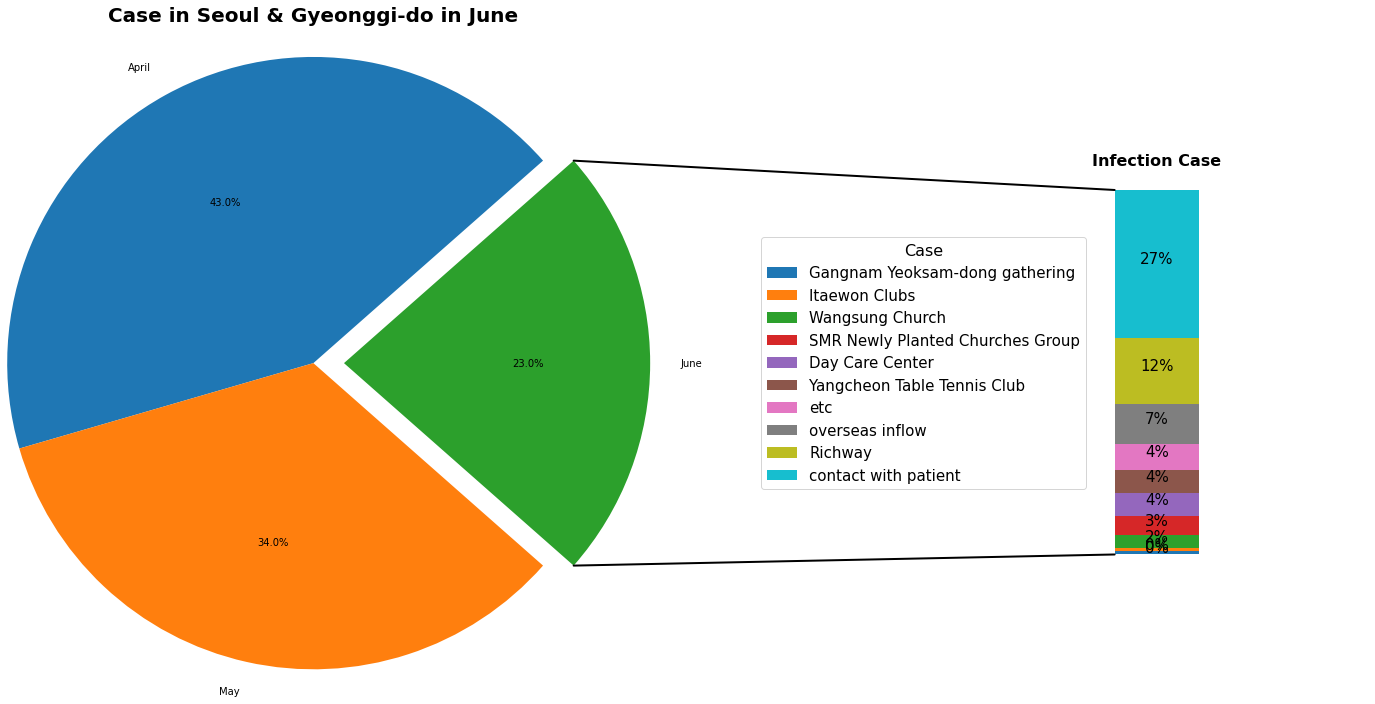

In [12]:
# 6월 서울경기지역 확진자 비율 Bar of Pie 그리기


frame = plt.figure(figsize = (20, 10))
pie3 = frame.add_subplot(1, 2, 1)
bar3 = frame.add_subplot(1, 2, 2)


ratios = [.43 , .34 , .23]
labels = ['April', 'May', 'June' ]

angle1 = - (360* ratios[0])/2
angle2 = - ((360 * ratios[0])+ (360* ratios[1])/2)
angle3 = - ((360 * ratios[0]) + (360* ratios[1])+ (360* ratios[2])/2)


# 파이 그리기

pie3.pie(ratios, autopct='%1.1f%%', startangle= angle3, labels=labels, counterclock = True, radius = 2, explode = (0, 0, 0.2) )
pie3.set_title("Case in Seoul & Gyeonggi-do in June", fontdict={ 'fontsize' : 20, 'fontweight':'bold' } , pad= 150)



# 바 그리기

xpos = 0
bottom = 0
ratios = confirmed_seoul_june.values
width = .2
# colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]


for j in range(len(ratios)):
    height = ratios[j]
    bar3.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + bar3.patches[j].get_height() / 2
    bottom += height
    bar3.text(xpos, ypos, "%d%%" % (bar3.patches[j].get_height() * .1),
             ha='center' , fontsize = 15 )

bar3.set_title('Infection Case' ,  fontsize = 16 ,  fontdict={'fontweight':'bold'})
bar3.axis('off')
bar3.set_xlim(- 2.5 * width, 2.5 * width)
bar3.legend(confirmed_seoul_june.index, loc = 'center right', bbox_to_anchor=(0.35, 0.5), fontsize = 15, title='Case', title_fontsize=16)


# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = pie3.patches[2].theta1, pie3.patches[2].theta2
center, r = pie3.patches[2].center, pie3.patches[2].r
bar_height = sum([item.get_height() for item in bar3.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r* np.sin(np.pi / 180 *  theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=bar3.transData,
                      xyB=(x, y), coordsB=pie3.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
bar3.add_artist(con)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r* np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=bar3.transData,
                      xyB=(x, y), coordsB=pie3.transData)
con.set_color([0, 0, 0])
bar3.add_artist(con)
con.set_linewidth(2)

plt.tight_layout()
# plt.savefig('6월_서울경기지역_확진자_비율_Bar_of_Pie', bbox_inches='tight') # 그림파일로 그래프를 저장함